In [1]:
### only for testing

# import osmnx
import osmnx as ox
import geopandas as gpd
from ipyleaflet import Map, Marker, GeoData, basemaps, LayersControl, Popup
from ipywidgets import HTML
import pandas as pd

# Specify the area of interest
place_name = "City of London, England, UK"

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-0.11383 51.51826, -0.11380 51.51812...",51.523312,51.506871,-0.072762,-0.11383,259210805,relation,51800,51.515618,-0.091998,boundary,administrative,12,0.656625,city,City of London,"City of London, Greater London, England, Unite..."


<AxesSubplot: >

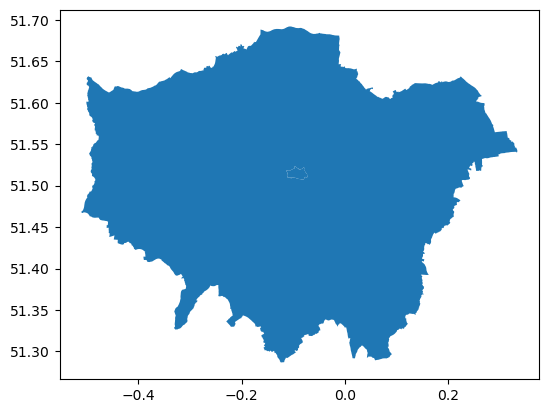

In [2]:
### define study area

# import osmnx
import osmnx as ox
import geopandas as gpd
import pandas as pd

# Specify the area of interest
GL = "London, England, UK"

# Get place boundary related to the place name as a geodataframe
GL_area = ox.geocode_to_gdf(GL)

#GL.plot()

# Specify the area of interest
Westminster = "Westminster, England, UK"
City = "City of London, England, UK"

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(GL)
area2 = ox.geocode_to_gdf(City)

area_both = pd.concat([area, area2])
area_both.head()
area_both.plot()



['name', 'geometry']


name  \
element_type osmid                                          
node         4354554594  St Bartholomew's Hospital museum   
             4513341393                   Bank of England   
way          43706245                  Dr Johnson's House   
             161420186                Prince Henry's Room   
             512846335                   London Mithraeum   
...                                                   ...   
             1315748829               Dorich House Museum   
relation     29795             Victoria and Albert Museum   
             177044                        British Museum   
             3609581                        Fulham Palace   
             15327162                       Queen's House   

                                                                  geometry  
element_type osmid                                                          
node         4354554594                          POINT (-0.10047 51.51772)  
             4513341393                          POINT (-0.08767 51.51418)  
way          43706245    POLYGON ((-0.10820 51.51487, -0.10813 51.51488...  
             161420186   POLYGON ((-0.11090 51.51378, -0.11096 51.51377...  
             512846335   POLYGON ((-0.09092 51.51246, -0.09046 51.51235...  
...                                                                    ...  
             1315748829  POLYGON ((-0.26311 51.43342, -0.26308 51.43327...  
relation     29795       POLYGON ((-0.17371 51.49713, -0.17369 51.49713...  
             177044      MULTIPOLYGON (((-0.12698 51.51964, -0.12687 51...  
             3609581     POLYGON ((-0.21583 51.47033, -0.21593 51.47038...  
             15327162    POLYGON ((-0.00392 51.48135, -0.00393 51.48136...  

[196 rows x 2 columns]

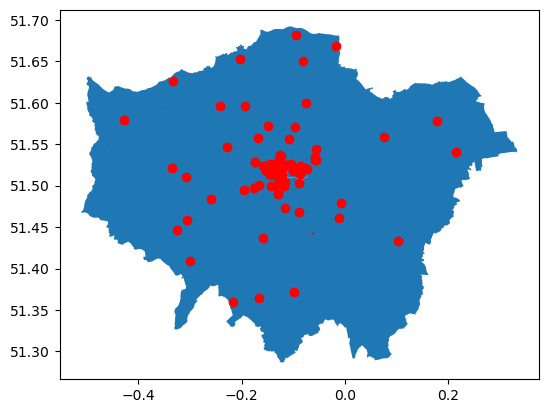

In [3]:
### define study attractions (museums)

# List key-value pairs for tags
tags = {'tourism': "museum"}   

attractionsCity = ox.features_from_place(City, tags)
attractionsWest = ox.features_from_place(GL, tags)
attractions = pd.concat([attractionsCity, attractionsWest])
attractions = attractions[["name","geometry"]]
attractions.head()
base= area_both.plot()
attractions.plot(ax=base, color="red")
attractions.head()
print(attractions.columns.tolist())
attractions = attractions.drop_duplicates(subset=['name'])
attractions_c = attractions[attractions['name'].notnull()]

# bb = attractions_c[attractions_c["name"] == "Big Ben"]
# bb
attractions_c

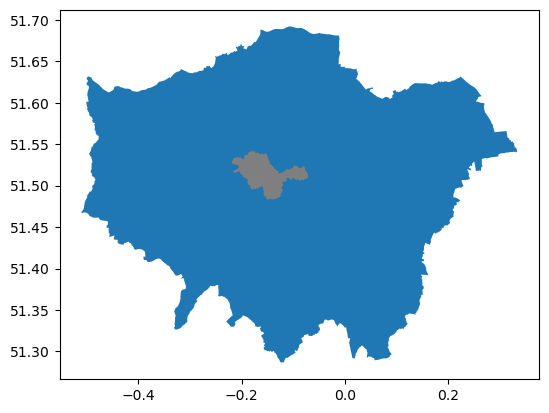

In [4]:
### for testing: streets in districts

# List key-value pairs for tags
#place_name = "City of London, England, UK"
tags = {'highway': True}   
streetsCity = ox.features_from_place(City, tags)
streetsWestminster = ox.features_from_place(Westminster, tags)
streets = pd.concat([streetsCity, streetsWestminster])
#streets.plot()
#streets.head()

streets_S = streets.loc[streets.geometry.geometry.type=='LineString']
base = area_both.plot()
base2 = streets_S.plot(ax=base, color = "grey")

name  \
element_type osmid                             
way          33083748         One New Change   
             367646970        Royal Exchange   
node         1614846601  The Arches Shopping   
             1734545116    Bush House Arcade   
             2095432658          Stow Bazaar   

                                                                  geometry  
element_type osmid                                                          
way          33083748    POLYGON ((-0.09636 51.51442, -0.09612 51.51438...  
             367646970   POLYGON ((-0.08747 51.51340, -0.08747 51.51341...  
node         1614846601                          POINT (-0.12444 51.50785)  
             1734545116                          POINT (-0.11705 51.51247)  
             2095432658                          POINT (-0.02871 51.58289)

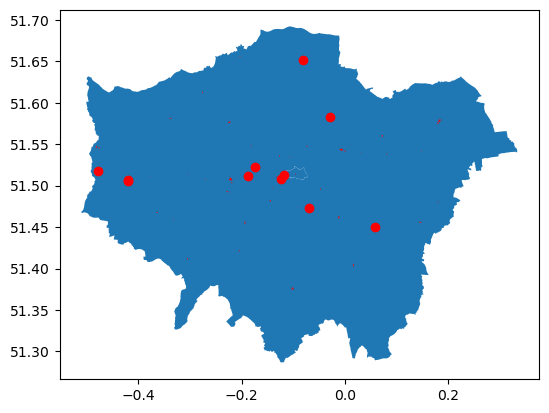

In [4]:
### define study attractions (shopping malls)

tags = {'shop': "mall"}
shopsCity = ox.features_from_place(City, tags)
shopsWestminster = ox.features_from_place(GL, tags)
shops = pd.concat([shopsCity, shopsWestminster])
shops = shops[["name","geometry"]]
base= area_both.plot()
shops.plot(ax=base, color="red")
shops.head()

<AxesSubplot: >

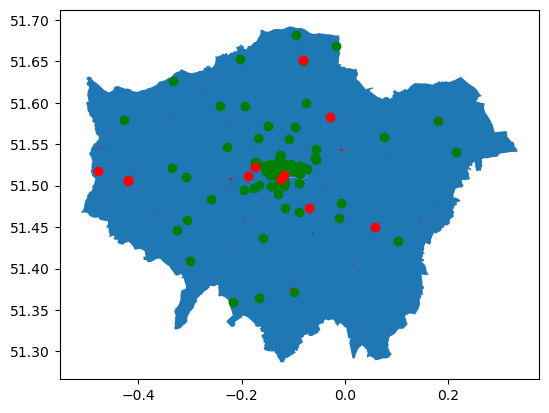

In [6]:
### old

attractions = attractions[["name", "geometry"]]
attractions = attractions.drop_duplicates(subset=['name'])
attractions_c = attractions[attractions['name'].notnull()]

# bb = attractions_c[attractions_c["name"] == "Big Ben"]
# bb
attractions_c

base = area_both.plot()
base2 = attractions.plot(ax=base, color='green')
shops.plot(ax=base2, color='red')


In [5]:
### show results on map

from ipyleaflet import Map, Marker, GeoData, basemaps, LayersControl, Popup, Polygon, Icon
from ipywidgets import HTML
import pyogrio
pyogrio.list_drivers()

geo_data = GeoData(geo_dataframe = area_both,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Districts')




center = (51.51788, -0.07902)
map = Map(center=center, zoom=10)

museumIcon = Icon(icon_url='museumIcon.png', icon_size=[38, 45])
shoppingIcon = Icon(icon_url='shoppingIcon.png', icon_size=[38, 45])

# Add a draggable marker to the map
# Dragging the marker updates the marker.location value in Python
#marker = Marker(location=center, draggable=True)
#map.add_control(marker)


geo_data_attractions = GeoData(geo_dataframe = attractions,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Attractions')

#map.add(geo_data_attractions, )
#map.add(LayersControl())

attraction_points = attractions.loc[attractions.geometry.geometry.type=='Point']
shops_points = shops.loc[shops.geometry.geometry.type=='Point']

#attraction_points.to_file("museums.shp")
#shops_points.to_file("shops.shp")


#area_polygon = area_both.loc[area_both.geometry]

# coord_list = [(x,y) for x,y in zip(attraction_points['geometry'].x , attraction_points['geometry'].y)]
# print(coord_list)
# for poi in attraction_points.itertuples():
#     print(poi.name)
#     marker = Marker(location=(poi.geometry.x , poi.geometry.y), draggable=False)
#     pop = HTML()
#     pop.value = "Name:"
#     pop.description = poi.name
#     marker.popup = pop
#     print(pop)
#     map.add(marker)
#print(attraction_points.iloc)
#poi = attraction_points.iloc[0]
#print(poi)
#print(len(attraction_points))   28
laenge=range(len(attraction_points))
print(laenge)
for x in (laenge):
    # filter out a nan value at the 28th position of attraction_points
    #if x==27:
        # do nothing
    #    useless=1
    #else:
        poi = attraction_points.iloc[x]
        #print(poi[0])
        marker2 = Marker(location=(poi.geometry.y , poi.geometry.x), icon=museumIcon, draggable=False)
        pop = HTML()
        pop.value = poi[0]
        #pop.description = poi[0]
        marker2.popup = pop
        #print(pop)
        map.add(marker2)

# add shops to map
laenge2=range(len(shops_points))
print(laenge2)
for x in (laenge2):
    # filter out a nan value at the 5th position of shops_points
    if x==4:
       # do nothing
       useless=1
    else:
        poi = shops_points.iloc[x]
        #print(poi[0])
        marker = Marker(location=(poi.geometry.y , poi.geometry.x), icon=shoppingIcon, draggable=False)
        pop = HTML()
        pop.value = poi[0]
        #pop.description = poi[0]
        marker.popup = pop
        #print(pop)
        map.add(marker)
#print(area_both.geometry)
#basis = Polygon(area_polygon)
#map.add(basis)
map.add(geo_data)
map.add(LayersControl())
display(map)

range(0, 80)
range(0, 11)


Map(center=[51.51788, -0.07902], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [ ]:
import pyvasa

pyvasa.


In [ ]:
# old
# for maybe adding museums, which are polygons in the dataset, but then the map lags

attraction_poly = attractions.loc[attractions.geometry.geometry.type=='Polygon']
attraction_poly["geometry"] = attraction_poly["geometry"].centroid

laenge=range(len(attraction_poly))

for x in laenge:
    # filter out a nan value at the 97th position of shops_points
    if x==97:
        #do nothing
       useless=1
    else:
        poi = attraction_poly.iloc[x]
        #print(poi[0])
        marker2 = Marker(location=(poi.geometry.y , poi.geometry.x), icon=museumIcon, draggable=False)
        pop = HTML()
        pop.value = poi[0]
        #pop.description = "Name:"
        marker2.popup = pop
        #print(pop)
        map.add(marker2)

#for a in attraction_points.iloc:
display(map)

C:\Users\Felix\AppData\Local\Temp\ipykernel_23596\4236542648.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  attraction_poly["geometry"] = attraction_poly["geometry"].centroid
C:\Users\Felix\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Map(bottom=87357.0, center=[51.51814351604911, -0.07965087890625001], controls=(ZoomControl(options=['position…

In [ ]:
# old
# exporting the attractions, which are polygons, to csv
df_attraction_poly = pd.DataFrame(attraction_poly) 
df_attraction_poly.to_csv('attractionsCity.csv', index=False, sep = ",") 